In [6]:
import numpy as np
import pandas as pd
from implementation.biclustering_ import Biclustering
import seaborn as sns
from tqdm import tqdm
import time

## Importing the data 
In this notebook, we will be exploring the [Gene Expression Data](https://arep.med.harvard.edu/biclustering/yeast.matrix) dataset. Along with the implementation of the biclustering algorithm presented in the paper [Biclustering of Expression Data](https://arep.med.harvard.edu/biclustering/). 
The notebook in divided into three sections:
#### Processing & visualizing the data
In this section, we will be processing and visualizing the data from the yeast matrix dataset associated to the work on this the clustering model was trained.
#### Running the biclustering model
In this section, we will be running the biclustering model on the chosen data. The training will be preformed using CROSS-VALIDATION in order to keep track of the generalization error.
### Visulaizing the results & comparison to the original biclusters
This section will be dedicated to visualizing the results of the biclustering model to the previous biclusters obtrained from the previous work in order to evaluate its accuracy.

# Exploring the data set - Yeast matrix

In [2]:
raw_data = pd.read_csv('./data/yeast_matrix.csv')

# extract & convert all the columns
data = pd.DataFrame(raw_data)
data.columns = [f"feature {i+1}" for i in range(data.shape[1])]

# converting the types acoordingly
df =data[:100].astype('float')

### Heatmap
Exploring the correlations between the features to better understand how the features are correlated.

<Axes: >

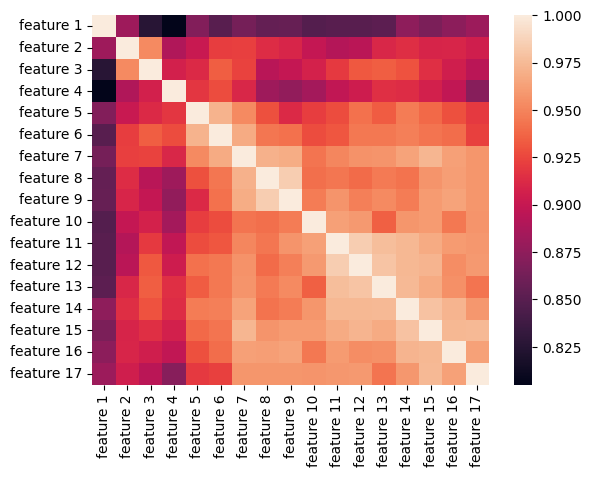

In [3]:
df.corr()
sns.heatmap(df.corr())

### Running the CC algorithm on a subset of 50 data points

In [7]:
# extracting a test set
# timing the execution for 5 biclusters 

test_set = data[:2000].astype('float').to_numpy()


sigma = 300
alpha =0.3

start_time = time.time()
biclustering = Biclustering(sigma= 1.2, alpha=0.3, nb_biclusters=5)
biclustering.run(test_set)
print(f"Time taken to generated 5 biclusters : {time.time() - start_time}")

    

/home/ikram/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/ikram/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/ikram/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Time taken to generated 5 biclusters : 3.930251121520996


In [8]:
start_time = time.time()
biclustering = Biclustering(sigma= 1.2, alpha=0.3, nb_biclusters=20)
biclustering.run(test_set)
print(f"Time taken to generated 20 biclusters : {time.time() - start_time}")

Time taken to generated 20 biclusters : 25.003001928329468


In [10]:
start_time = time.time()
biclustering = Biclustering(sigma= 1.2, alpha=0.3, nb_biclusters=30)
biclustering.run(test_set)
print(f"Time taken to generated 30 biclusters : {time.time() - start_time}")

Time taken to generated 30 biclusters : 50.69704794883728
